## **New York City Taxi Fare Prediction - by David Guzzi**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.2f}'.format)

##### **1. Lectura de matriz de datos**

In [3]:
#Lectura y visualización de información
df = pd.read_csv('train_s.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,17358777,2009-12-16 19:56:08.0000002,6.10,2009-12-16 19:56:08 UTC,-73.96,40.77,-73.97,40.76,1
1,53320139,2012-05-03 09:31:00.000000164,6.10,2012-05-03 09:31:00 UTC,-74.00,40.74,-73.99,40.74,1
2,42864741,2013-07-25 19:08:33.0000003,11.50,2013-07-25 19:08:33 UTC,-73.97,40.74,-73.99,40.74,1
3,26375625,2011-12-02 16:30:00.00000089,3.30,2011-12-02 16:30:00 UTC,-73.97,40.77,-73.97,40.77,1
4,41418930,2014-01-08 03:43:57.0000001,19.50,2014-01-08 03:43:57 UTC,-73.98,40.75,-73.89,40.77,1


In [4]:
#Eliminación de primera columna
df = df.iloc[:,1:]
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-12-16 19:56:08.0000002,6.10,2009-12-16 19:56:08 UTC,-73.96,40.77,-73.97,40.76,1
1,2012-05-03 09:31:00.000000164,6.10,2012-05-03 09:31:00 UTC,-74.00,40.74,-73.99,40.74,1
2,2013-07-25 19:08:33.0000003,11.50,2013-07-25 19:08:33 UTC,-73.97,40.74,-73.99,40.74,1
3,2011-12-02 16:30:00.00000089,3.30,2011-12-02 16:30:00 UTC,-73.97,40.77,-73.97,40.77,1
4,2014-01-08 03:43:57.0000001,19.50,2014-01-08 03:43:57 UTC,-73.98,40.75,-73.89,40.77,1


In [5]:
#Detalles generales de la información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662716 entries, 0 to 1662715
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1662716 non-null  object 
 1   fare_amount        1662716 non-null  float64
 2   pickup_datetime    1662716 non-null  object 
 3   pickup_longitude   1662716 non-null  float64
 4   pickup_latitude    1662716 non-null  float64
 5   dropoff_longitude  1662706 non-null  float64
 6   dropoff_latitude   1662706 non-null  float64
 7   passenger_count    1662716 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 101.5+ MB


In [6]:
#Corroboramos que sean registros únicos
len(df) == df['key'].nunique()

True

In [7]:
#Adecuamos formato a columna 'pickup_datetime' y corroboramos
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662716 entries, 0 to 1662715
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   key                1662716 non-null  object             
 1   fare_amount        1662716 non-null  float64            
 2   pickup_datetime    1662716 non-null  datetime64[ns, UTC]
 3   pickup_longitude   1662716 non-null  float64            
 4   pickup_latitude    1662716 non-null  float64            
 5   dropoff_longitude  1662706 non-null  float64            
 6   dropoff_latitude   1662706 non-null  float64            
 7   passenger_count    1662716 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 101.5+ MB


#### **2. Análisis de variables** 
##### **2.A. 'taxi_amount'**

In [8]:
#Exploraremos la variable o target a predecir: 'fare_amount'
df[['fare_amount']].describe()

,fare_amount
count,1662716.00
mean,11.33
std,9.82
min,-52.00
25%,6.00
50%,8.50
75%,12.50
max,850.00


In [45]:
#Se aprecia diferencias considerables entre máximos y mínimos.

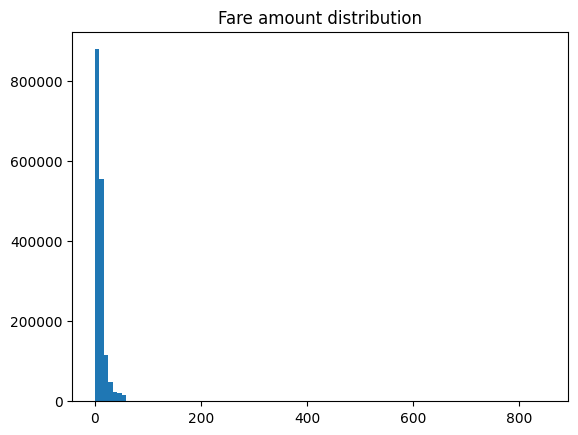

In [59]:
#Se grafica un histograma de 'fare_amount' para conocer la distribución de la variable 
fig, ax = plt.subplots()
ax.hist(df['fare_amount'], bins=100)
ax.set_title('Fare amount distribution')
plt.show()

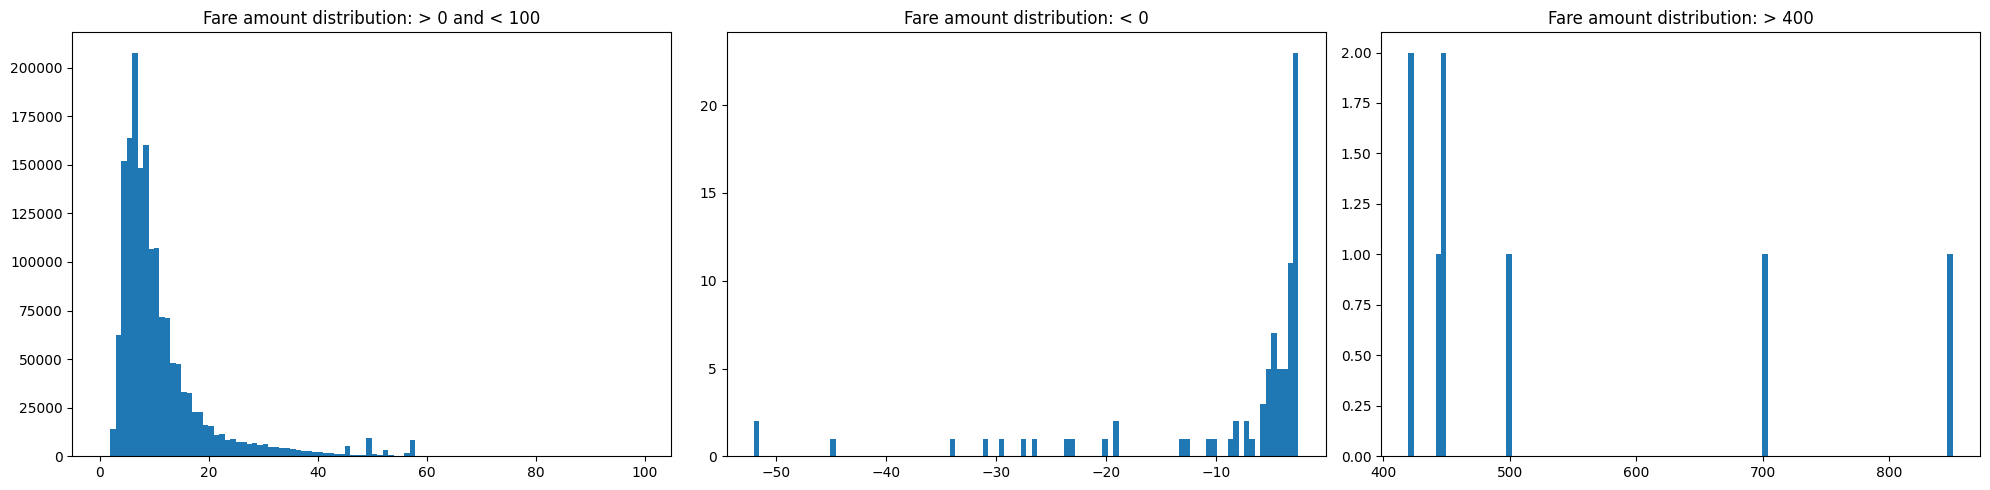

In [18]:
#El histograma de 'fare_amount' revela que la misma posee tanto valores ilógicos (valores negativos) como valores positivos extremos.
#Para una mejor visualización, se presentan 3 nuevas visualizaciones 

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].hist(df[(df['fare_amount'] < 100) & (df['fare_amount'] > 0)]['fare_amount'], bins=100)
axs[0].set_title('Fare amount distribution: > 0 and < 100')

axs[1].hist(df[df['fare_amount'] < 0]['fare_amount'], bins=100)
axs[1].set_title('Fare amount distribution: < 0')

axs[2].hist(df[df['fare_amount'] > 400]['fare_amount'], bins=100)
axs[2].set_title('Fare amount distribution: > 400')

plt.tight_layout()
plt.show()

In [40]:
#Se observa que los valores de la variable 'fare_amount' se concentra en valores mayores a cero y menores a veinte. El resto de los valores consituirán, 
#muy posiblemente, casos de valores extremos tipo 'outliers'

In [19]:
#En primer lugar, se eliminan aquellos registros con valores negativos en target 'fare_amount' por considerarse ilógicos
df = df[df['fare_amount'] > 0]

In [44]:
#Se analizan si los datos extremos positivos constituyen outliers y se determinan decisiones a tomar
#Se procede al cálculo del Rango Intercuartílico (IQR)

Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['fare_amount'] > (Q3 + 1.5 * IQR))]
print(f"La mediana de los valores extremos considerados como 'outliers' es de {outliers['fare_amount'].median()}")

#Las observaciones calificadas como outliers (según metodología tradicional), no serán eliminadas de la matriz de información hasta tanto en cuanto 
#no se comparen las mimas con otras variables de la matriz (altos valores de 'fare_amount' pueden responder a horarios cacracterizados por mucha demanda
#o bien a recorridos significativos en distancia).

La mediana de los valores extremos considerados como 'outliers' es de 32.5


##### **2.B. 'passenger_count'**

In [47]:
df[['passenger_count']].describe()

,passenger_count
count,1662585.00
mean,1.68
std,1.33
min,0.00
25%,1.00
50%,1.00
75%,2.00
max,208.00


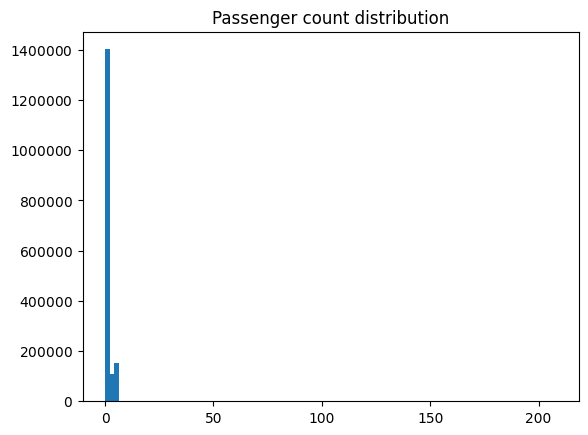

In [58]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()
ax.hist(df['passenger_count'], bins=100)
ax.set_title('Passenger count distribution')

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

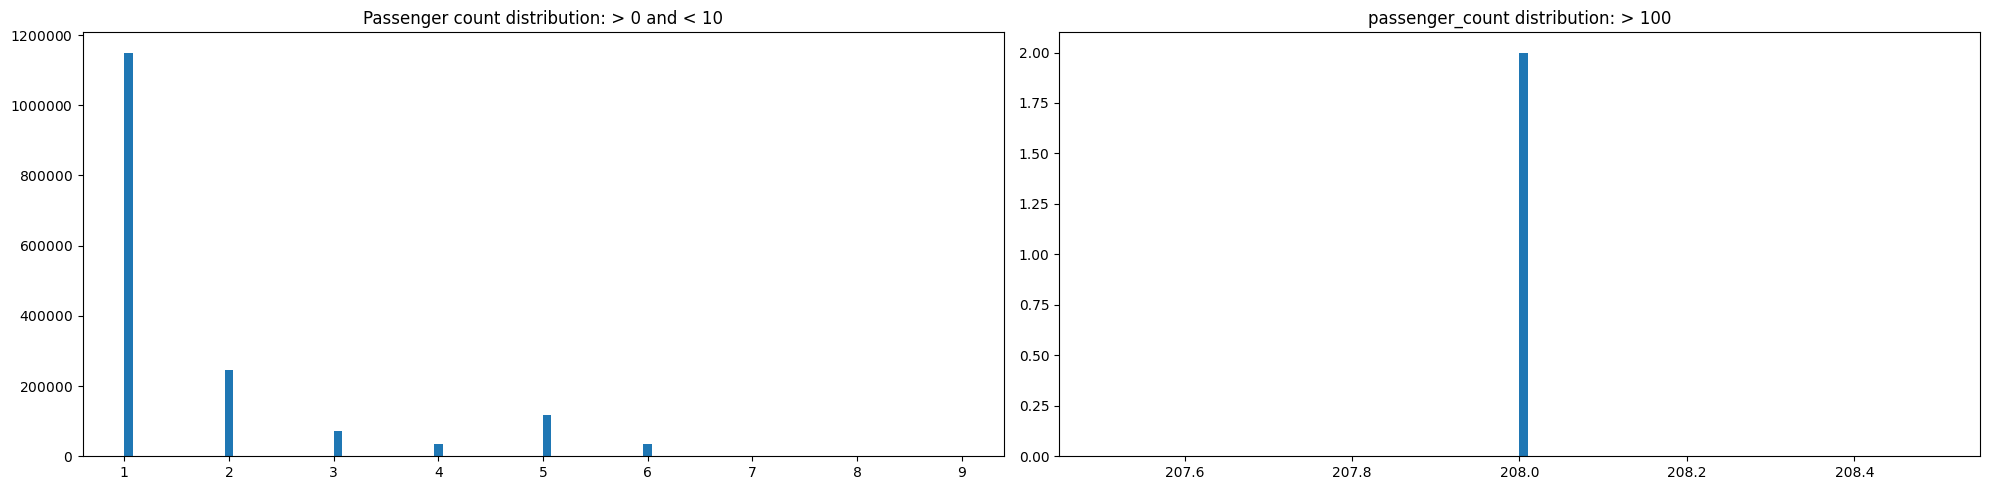

In [53]:
from matplotlib.ticker import ScalarFormatter
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].hist(df[(df['passenger_count'] < 10) & (df['passenger_count'] > 0)]['passenger_count'], bins=100)
axs[0].set_title('Passenger count distribution: > 0 and < 10')

axs[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0].ticklabel_format(style='plain', axis='y')

axs[1].hist(df[df['passenger_count'] > 100]['passenger_count'], bins=100)
axs[1].set_title('passenger_count distribution: > 100')

plt.tight_layout()
plt.show()

In [61]:
#Dado que los casos extremos positivos constituyen un sinsentido (208 pasajes en un solo vehículo), se eliminarán de la matriz de datos
df = df[df['passenger_count'] < 10]

##### *Relación entre 'fare_amount' y 'passenger_count*

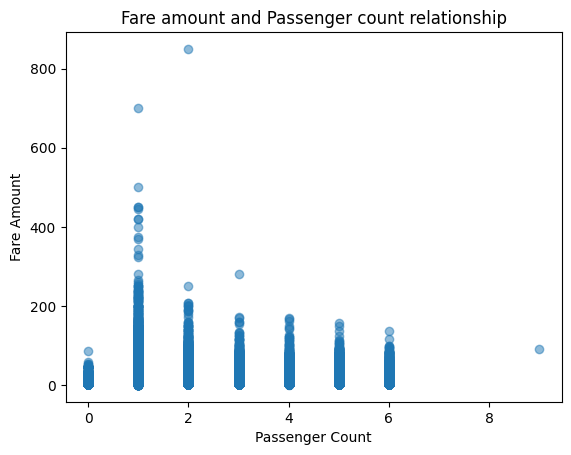

In [65]:
fig, ax = plt.subplots()
ax.scatter(df['passenger_count'], df['fare_amount'], alpha=0.5)
ax.set_title('Fare amount and Passenger count relationship')
ax.set_xlabel('Passenger Count')
ax.set_ylabel('Fare Amount')
plt.show()

In [66]:
#El gráfico de dispersión exhibe una no relación entre las variables, lo cual suena lógico: fare_amount no depende, en principio, de la cantidad de pasajeros.

In [57]:
# df[(df['pickup_longitude'] == df['dropoff_longitude']) & (df['pickup_latitude'] == df['dropoff_latitude'])]

In [61]:
def haversine(lon1, lat1, lon2, lat2):
    # Convertir grados a radianes
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Diferencias de coordenadas
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Fórmula de Haversine
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radio de la Tierra en kilómetros
    return c * r

In [63]:
df['distance'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

0   -73.96
1   -74.00
2   -73.97
3   -73.97
4   -73.98
Name: pickup_longitude, dtype: float64

In [65]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distancia,distance
1662711,2010-07-12 15:13:00.00000069,4.90,2010-07-12 15:13:00+00:00,-73.96,40.77,-73.96,40.78,1,1.10,1.10
1662712,2011-02-13 19:45:44.0000007,3.70,2011-02-13 19:45:44+00:00,-73.99,40.75,-73.99,40.74,1,0.72,0.72
1662713,2012-04-29 19:43:00.000000186,7.70,2012-04-29 19:43:00+00:00,-73.98,40.77,-73.96,40.77,1,2.25,2.25
1662714,2014-03-31 19:44:31.0000001,10.50,2014-03-31 19:44:31+00:00,-73.95,40.78,-73.98,40.77,1,2.74,2.74
1662715,2010-07-04 17:43:15.0000002,7.30,2010-07-04 17:43:15+00:00,-73.98,40.74,-74.01,40.74,1,2.48,2.48
